<a href="https://colab.research.google.com/github/Bazinga97/Deep-learning/blob/main/DL_Batch_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/concertriccir2.csv')


In [6]:
df.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


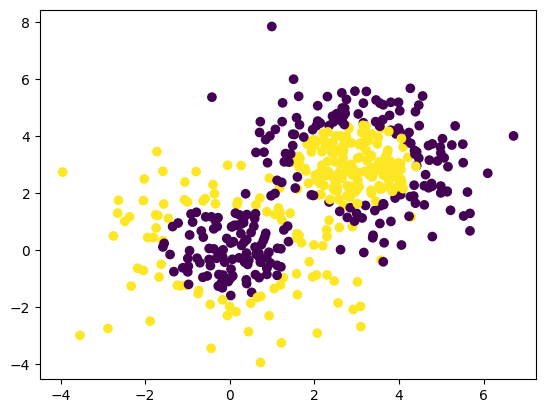

In [7]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [8]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [9]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [13]:
## without batch normalization
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4887 - loss: 0.6917 - val_accuracy: 0.4300 - val_loss: 0.6936
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5385 - loss: 0.6903 - val_accuracy: 0.4300 - val_loss: 0.6943
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5013 - loss: 0.6899 - val_accuracy: 0.4300 - val_loss: 0.6945
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5414 - loss: 0.6899 - val_accuracy: 0.4300 - val_loss: 0.6951
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5366 - loss: 0.6871 - val_accuracy: 0.4300 - val_loss: 0.6955
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5154 - loss: 0.6889 - val_accuracy: 0.4300 - val_loss: 0.6958
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4986 - loss: 0.6885 - val_accuracy: 0.4300 - val_loss: 0.6962
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5377 - loss: 0.6850 - val_accuracy: 0.4300 - 

In [14]:
## with batch normalization
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 3)                   │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.4254 - loss: 0.7500 - val_accuracy: 0.4300 - val_loss: 1.1519
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4138 - loss: 0.7427 - val_accuracy: 0.4300 - val_loss: 1.0291
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4782 - loss: 0.7324 - val_accuracy: 0.4700 - val_loss: 0.9516
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4317 - loss: 0.7245 - val_accuracy: 0.4700 - val_loss: 0.8984
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4474 - loss: 0.7227 - val_accuracy: 0.4800 - val_loss: 0.8596
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4702 - loss: 0.7123 - val_accuracy: 0.5200 - val_loss: 0.8329
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4396 - loss: 0.7167 - val_accuracy: 0.5200 - val_loss: 0.8118
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4459 - loss: 0.7106 - val_accuracy: 0.5200 - 

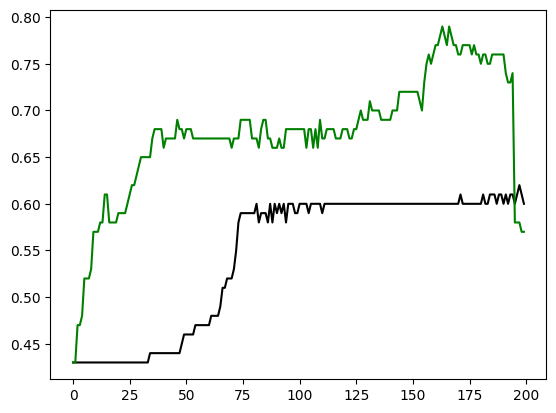

In [17]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')